# Titanic

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Preprocessing

In [2]:
data_df = pd.read_csv("titanic.csv")
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#test_df = pd.read_csv("test.csv")
#test_df.head()

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# nutteloze variabelen verwijderen
data_df.drop(["Cabin", "PassengerId", "Ticket", "Name"], axis=1, inplace=True)

In [6]:
data_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
data_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
data_df.dropna(axis=0, inplace=True)

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [10]:
data_df["Sex"] = data_df["Sex"].astype('category')
data_df["Embarked"] = data_df["Embarked"].astype('category')

In [11]:
data_df["Sex_cat"] = data_df["Sex"].cat.codes
data_df["Embarket_cat"] = data_df["Embarked"].cat.codes

In [12]:
X_df = data_df.drop(["Survived", "Sex", "Embarked"], axis=1)
Y_df = data_df["Survived"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.25, random_state=0)

## Modelling: Decision Trees

In [14]:
dtreeModel = DecisionTreeClassifier()

In [15]:
dtreeModel.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
dtreeModel.score(x_test, y_test)

0.7696629213483146

In [17]:
predictions = dtreeModel.predict(x_test)

In [18]:
cm = metrics.confusion_matrix(y_test, predictions)

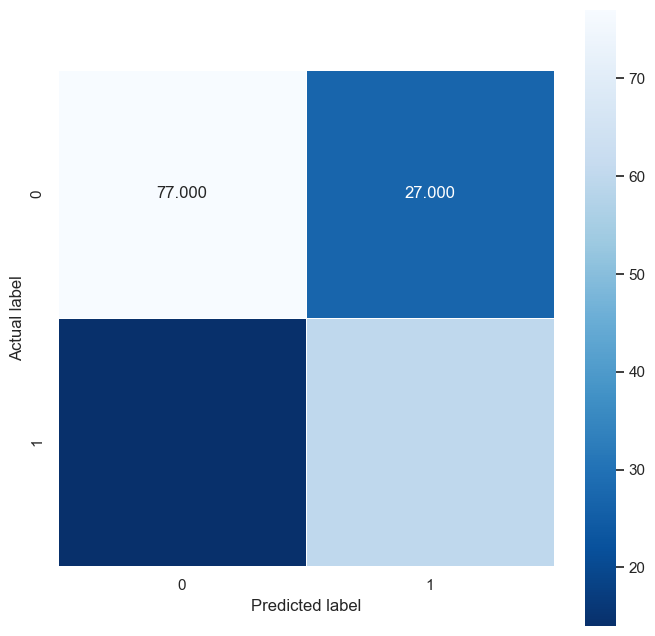

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Modelling: k Nearest Neighbors

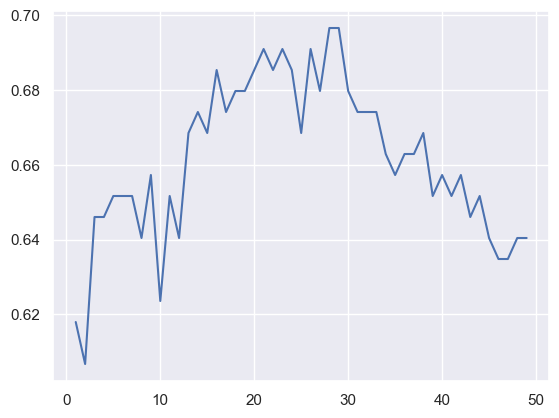

In [20]:
n = 50
acc_list = []
for i in range(1,n):
    model = KNeighborsClassifier(i)
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    acc_list.append(acc)
plt.plot(range(1,n), acc_list)

In [21]:
neighborsModel = KNeighborsClassifier(28)
neighborsModel.fit(x_train, y_train)
neighborsModel.score(x_test, y_test)

0.6966292134831461

In [25]:
neighborsModel = KNeighborsClassifier(29)
neighborsModel.fit(x_train, y_train)
neighborsModel.score(x_test, y_test)

0.6966292134831461

In [22]:
predictions = neighborsModel.predict(x_test)

In [23]:
cm = metrics.confusion_matrix(y_test, predictions)

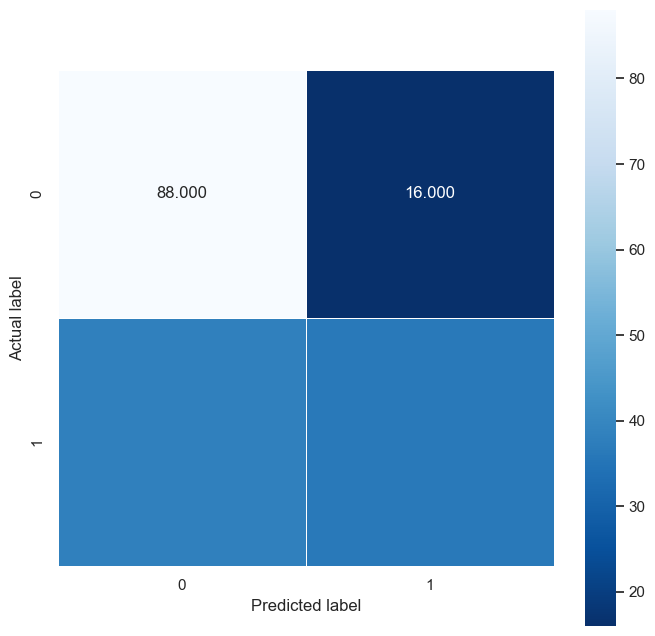

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Conclusie

Decision tree model is beter blablabla.